In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ds_salaries.csv')
pd.set_option('max_colwidth', None)

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [8]:
df.duplicated().sum()

1171

In [9]:
df.loc[df.duplicated, :]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [10]:
duplicates = df.duplicated(subset=['work_year', 'experience_level', 'employment_type', 
                                   'job_title', 'salary', 'salary_currency', 'salary_in_usd', 
                                   'employee_residence', 'remote_ratio', 'company_location', 'company_size'])

count_duplicates = duplicates.sum()
print('count of duplicates', count_duplicates)

count of duplicates 1171


In [11]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [12]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [13]:
employment_type_mapping = {
    'FT': 'Full time',
    'PT': 'Part time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

experience_level_mapping = {
    'SE': 'Senior-Level',
    'MI': 'Mid-Level',
    'EN': 'Entry-Level',
    'EX': 'Executive-Level'
}

df['employment_type'] = df['employment_type'].replace(employment_type_mapping)
df['experience_level'] = df['experience_level'].replace(experience_level_mapping)

print(df['employment_type'])
print(df['experience_level'])

0       Full time
1        Contract
2        Contract
3       Full time
4       Full time
          ...    
3750    Full time
3751    Full time
3752    Full time
3753     Contract
3754    Full time
Name: employment_type, Length: 3755, dtype: object
0       Senior-Level
1          Mid-Level
2          Mid-Level
3       Senior-Level
4       Senior-Level
            ...     
3750    Senior-Level
3751       Mid-Level
3752     Entry-Level
3753     Entry-Level
3754    Senior-Level
Name: experience_level, Length: 3755, dtype: object


In [14]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

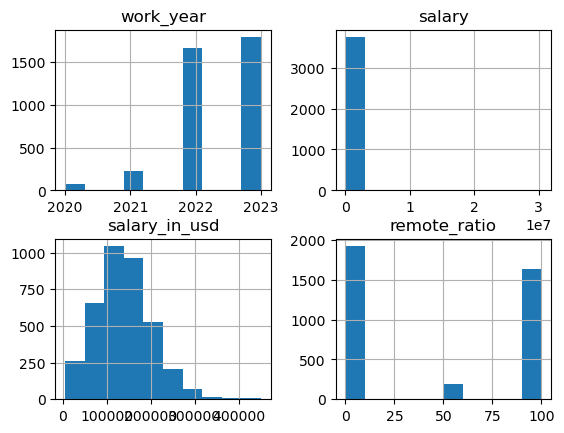

In [15]:
df.hist()

In [16]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

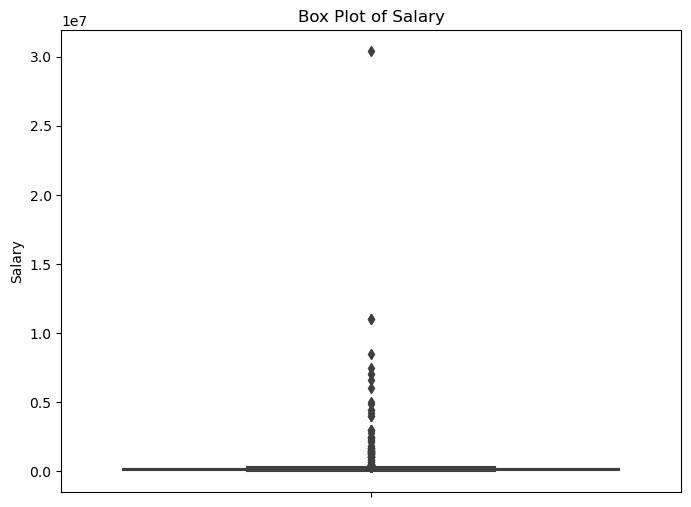

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='salary')
plt.title('Box Plot of Salary')
plt.ylabel('Salary')
plt.show()

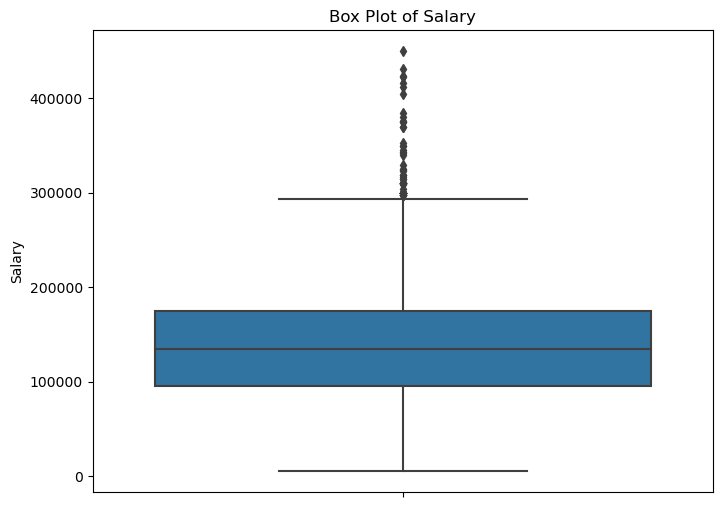

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='salary_in_usd')
plt.title('Box Plot of Salary')
plt.ylabel('Salary')
plt.show()

In [19]:
mean_salary = df['salary_in_usd'].mean()
min_salary = df['salary_in_usd'].min()
max_salary = df['salary_in_usd'].max()

print(f"Mean: {mean_salary}, Min: {min_salary}, Max: {max_salary}")

Mean: 137570.38988015978, Min: 5132, Max: 450000


In [20]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

In [22]:
df_cleaned = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

In [23]:
mean_salary = df_cleaned['salary_in_usd'].mean()
min_salary = df_cleaned['salary_in_usd'].min()
max_salary = df_cleaned['salary_in_usd'].max()

print(f"Mean: {mean_salary}, Min: {min_salary}, Max: {max_salary}")

Mean: 137182.1368, Min: 5132, Max: 412000


In [24]:
from scipy.stats.mstats import winsorize

In [25]:
df_modified = df.copy(deep=True)

In [26]:
winsorized_salary = winsorize(df_modified['salary_in_usd'], (0.05, 0.05))

In [27]:
df_modified['salary_in_usd'] = winsorized_salary

In [28]:
mean_salary = df_modified['salary_in_usd'].mean()
min_salary = df_modified['salary_in_usd'].min()
max_salary = df_modified['salary_in_usd'].max()

print(f"Mean: {mean_salary}, Min: {min_salary}, Max: {max_salary}")

Mean: 136567.8018641811, Min: 40038, Max: 249500


# Average Salaries

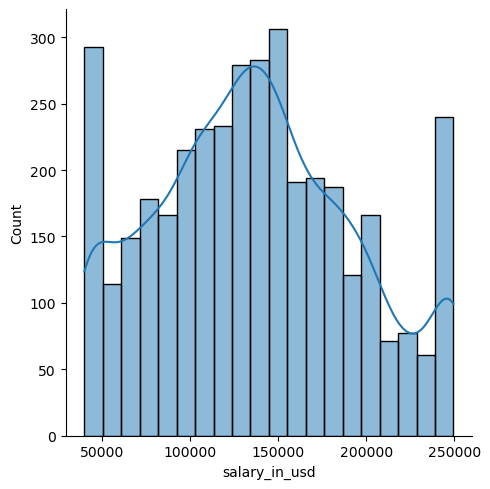

In [35]:
sns.displot(data=df_modified, x='salary_in_usd', kde=True, bins=20);

In [29]:
df['employment_type'].value_counts()

Full time    3718
Part time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64

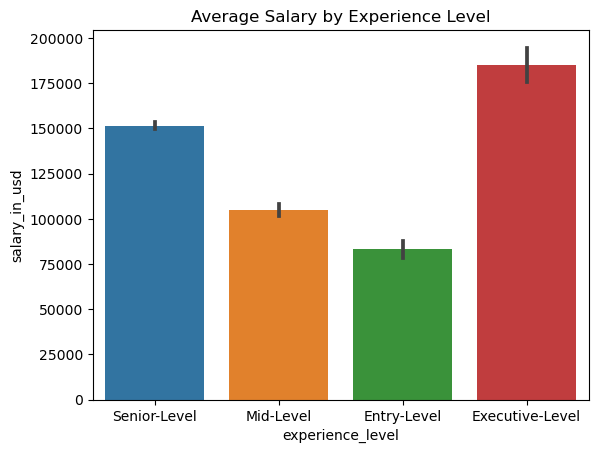

In [30]:
sns.barplot(x='experience_level', y='salary_in_usd', data=df_modified)
plt.title('Average Salary by Experience Level')
plt.show()

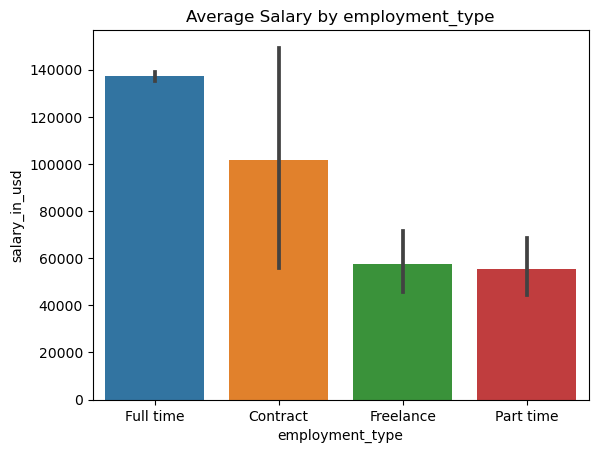

In [31]:
sns.barplot(x='employment_type', y='salary_in_usd', data=df_modified)
plt.title('Average Salary by employment_type')
plt.show()

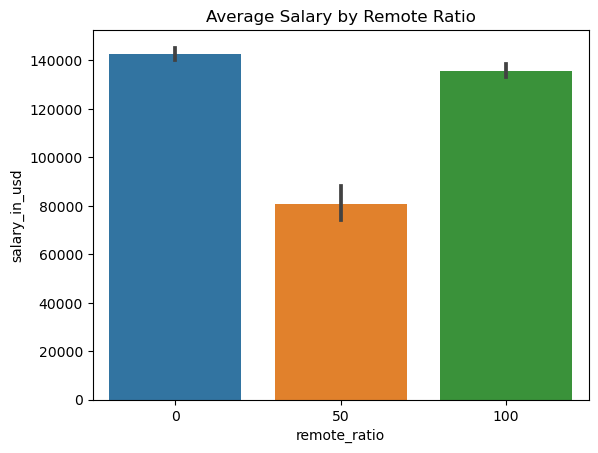

In [32]:
sns.barplot(x='remote_ratio', y='salary_in_usd', data=df_modified)
plt.title('Average Salary by Remote Ratio')
plt.show()

In [46]:
unique_counts = df_modified['remote_ratio'].value_counts()
print(unique_counts)

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64


In [83]:
df_sorted = df_modified.sort_values('work_year')

In [37]:
average_salaries = df_sorted.groupby('work_year')['salary_in_usd'].mean()

In [38]:
is_increasing = average_salaries.diff().gt(0).all()

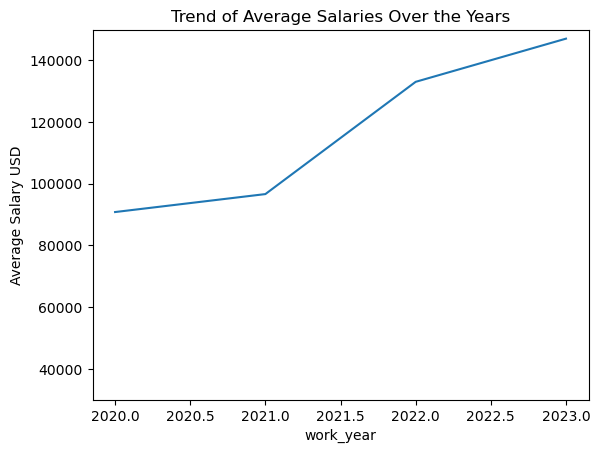

In [86]:
sns.lineplot(x=average_salaries.index, y=average_salaries)
plt.xlabel=('work_year')
plt.ylabel('Average Salary USD')
plt.title('Trend of Average Salaries Over the Years')
plt.ylim(bottom=30000)
plt.show()

In [52]:
salary_by_location = pd.pivot_table(df_modified,
                                    index= 'remote_ratio',
                                    columns= 'work_year',
                                    values= 'salary_in_usd',
                                    aggfunc= 'mean'
                                   )
salary_by_location['% Change'] = salary_by_location.pct_change(axis=1).iloc[:, -1].apply(lambda x: '{:.2%}'.format(x))

print(salary_by_location)

work_year             2020           2021           2022           2023  \
remote_ratio                                                              
0             85594.375000   99481.235294  134143.175809  150180.635972   
50            81807.476190   78006.618421   85848.338710   77496.066667   
100           97754.410256  107575.816667  135367.903479  144260.145025   

work_year    % Change  
remote_ratio           
0              11.96%  
50             -9.73%  
100             6.57%  


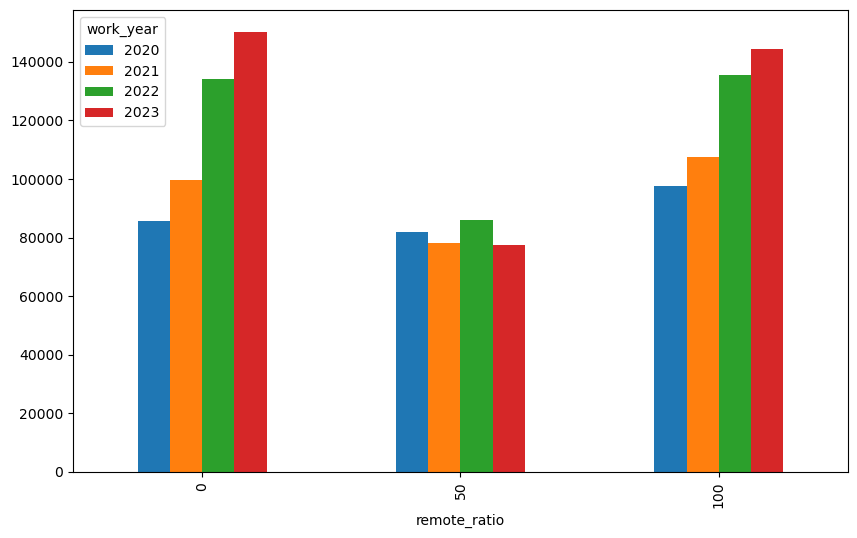

In [56]:
salary_by_location.plot(kind='bar', figsize=(10, 6))
plt.show()

## Top Jobs by Year

In [40]:
#using original df as the jobs are still valid, just not the salaries as we identified outliers which we removed in df_modified
job_counts = df.groupby(['work_year', 'job_title']).size().reset_index(name='count')

top_10_jobs = job_counts.groupby('work_year').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)
top_10_jobs = top_10_jobs.sort_values(by='count', ascending=False)

Text(0.5, 1.0, 'Top 10 Jobs by Year')

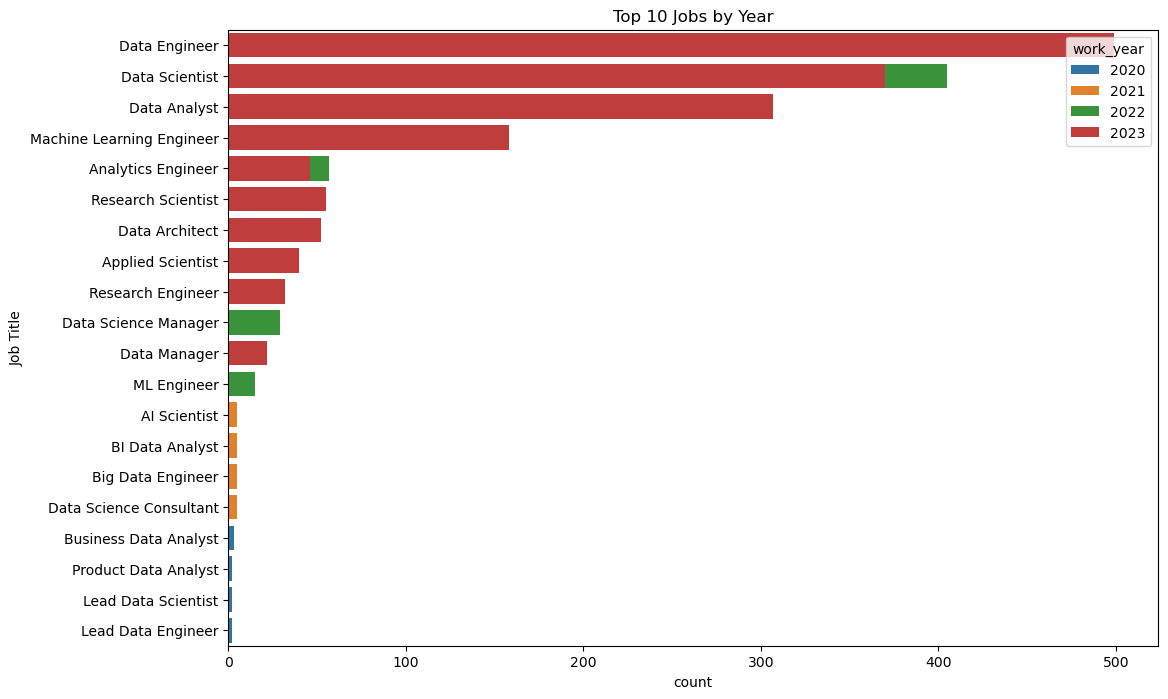

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_jobs, x='count', y='job_title', hue='work_year', dodge=False)
plt.ylabel('Job Title')
plt.title('Top 10 Jobs by Year')

In [42]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-Level,Full time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-Level,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Mid-Level,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior-Level,Full time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-Level,Full time,Data Scientist,120000,USD,120000,CA,100,CA,M


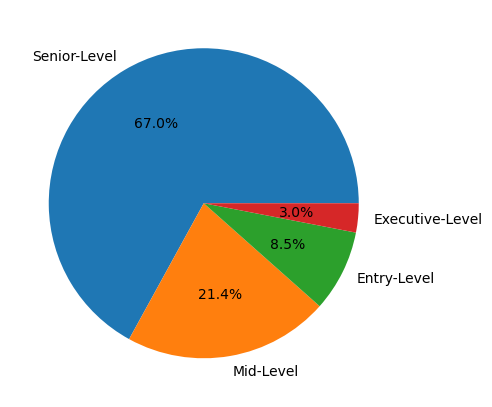

In [43]:
experince_counts = df['experience_level'].value_counts()

plt.figure(figsize=(5,6))
plt.pie(experince_counts, labels=experince_counts.index, autopct= '%1.1f%%')
plt.show()

In [58]:
df_modified.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-Level,Full time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Mid-Level,Contract,ML Engineer,30000,USD,40038,US,100,US,S
2,2023,Mid-Level,Contract,ML Engineer,25500,USD,40038,US,100,US,S
3,2023,Senior-Level,Full time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior-Level,Full time,Data Scientist,120000,USD,120000,CA,100,CA,M


In [81]:
df_modified.groupby('job_title')['salary_in_usd'].agg(['min', 'mean', 'max'])

,min,mean,max
job_title,,,
3D Computer Vision Researcher,40038,42528.500000,50000
AI Developer,40038,132823.727273,249500
AI Programmer,40038,55019.000000,70000
AI Scientist,40038,105351.500000,249500
Analytics Engineer,40038,151641.815534,249500
...,...,...,...
Research Engineer,60000,161230.000000,249500
Research Scientist,40038,155665.878049,249500
Software Data Engineer,50000,62510.000000,75020
